# Introduction

Analyzing the effects of various features on 2015 Kings County housing prices using Linear Regression Modeling.
Specifically looking at effects on Price Per Square Foot (PSF).
PSF is another measure of value in addition to just overall price.

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#Importing model function from class
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [3]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')

# Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Visualizations

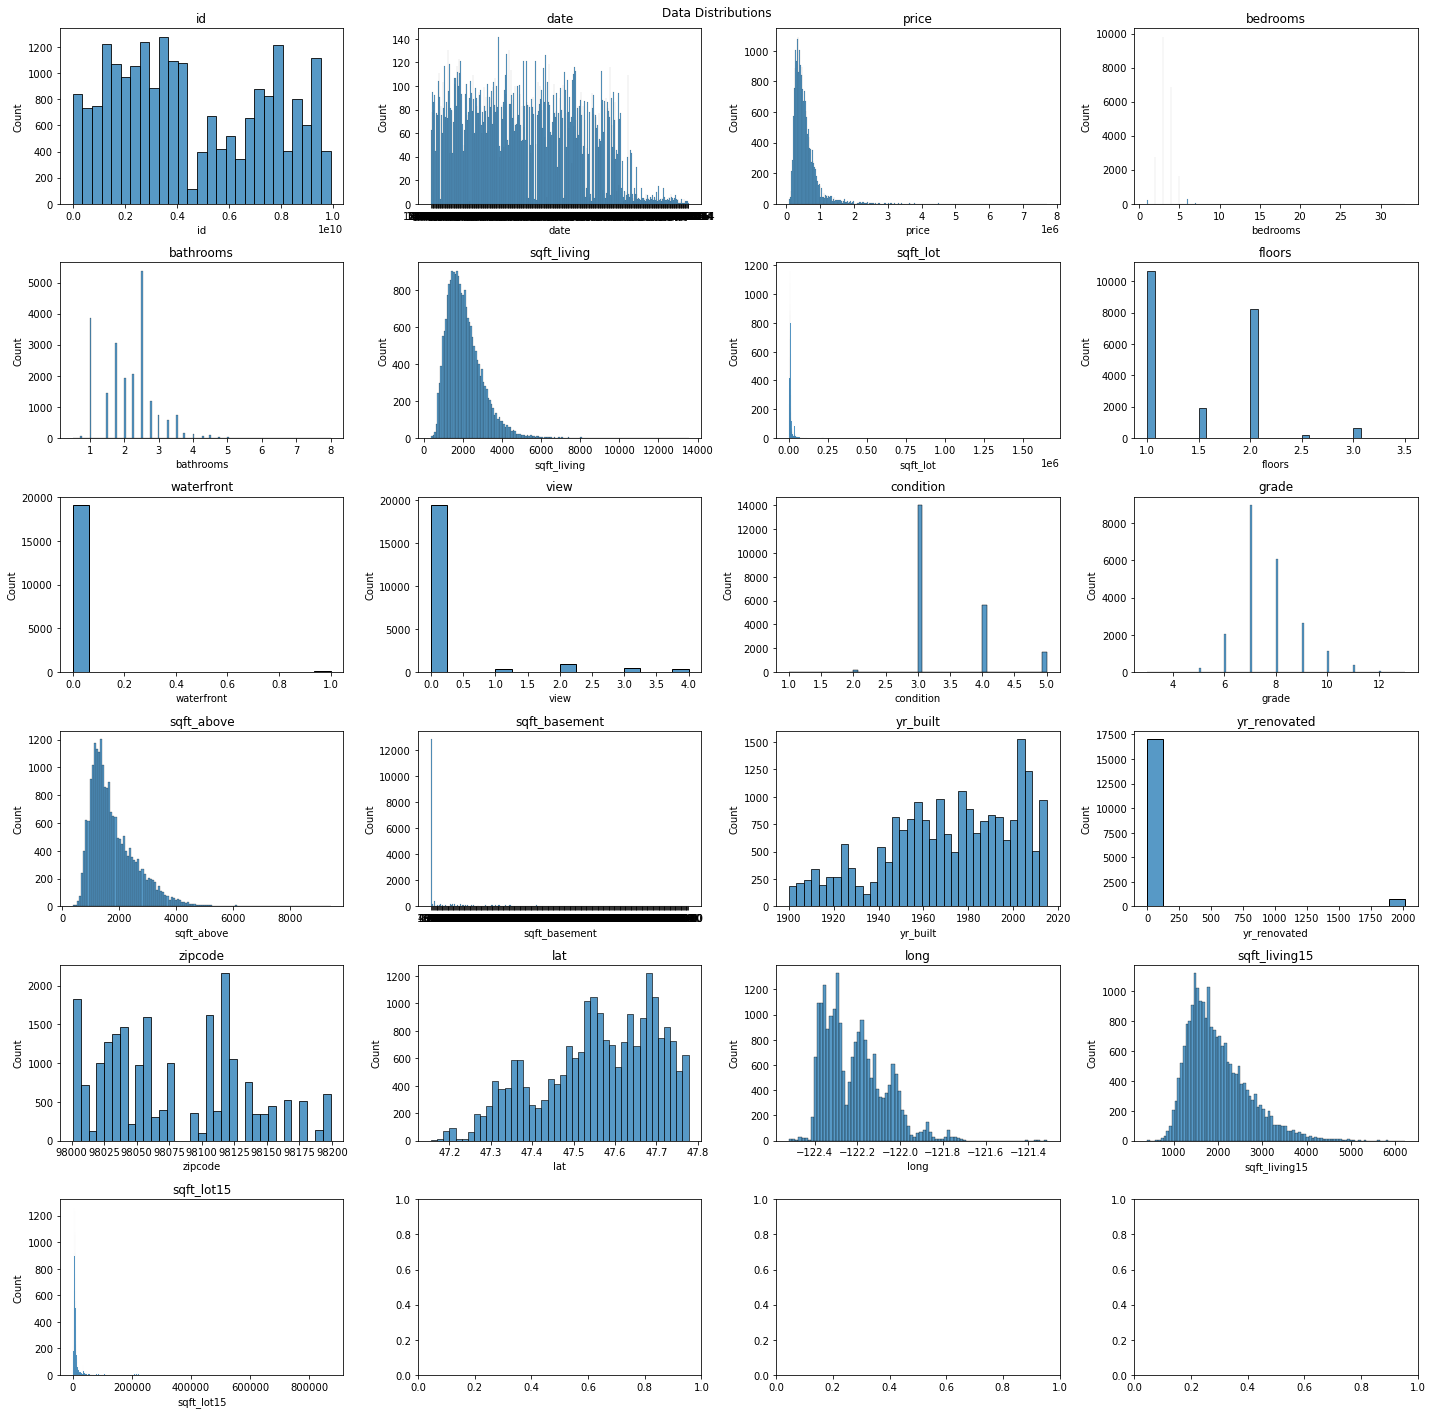

In [8]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=6)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

## Findings

* Many of the distributions are skewed to the right with strong outliers
* Other features do not make sense to analyze numerically such as: id, date, zipcodes
* A few others need additional exploration such as: basement sqft, year renovated that also have large 0 value counts

In [9]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15','zipcode', 'lat','long']

# Data Cleaning

## Dropping Unwanted Columns

In [10]:
cleaned_df = df.drop(dropped_columns,axis=1)

In [11]:
cleaned_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## Filling NA values with 0

In [12]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842


In [13]:
cleaned_df = cleaned_df.fillna(0)

In [14]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0


## Converting Basement SqFt to Float

In [15]:
cleaned_df = cleaned_df.replace(to_replace='?',value=0)

In [16]:
cleaned_df['sqft_basement'] = cleaned_df.sqft_basement.astype(float)

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


# Generating and Modifying Features

In [18]:
mod_df = cleaned_df

## Price Per Square Foot (PSF) Using Sqft_Above

In [19]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

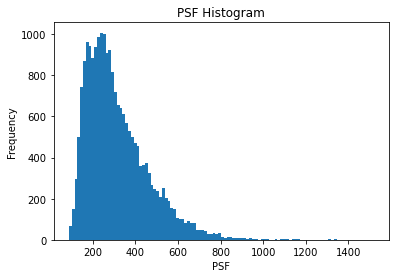

In [20]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

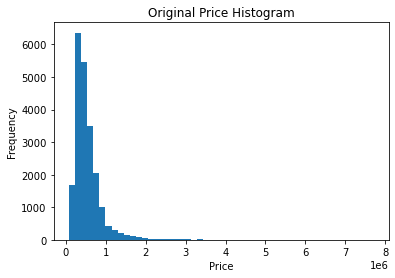

In [21]:
plt.hist(mod_df['price'], bins=50);
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

* PSF appears more normally distributed than original price, 
  but distribution remains skewed towards higher PSF

## Living to Lot Sqft Ratio

In [22]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

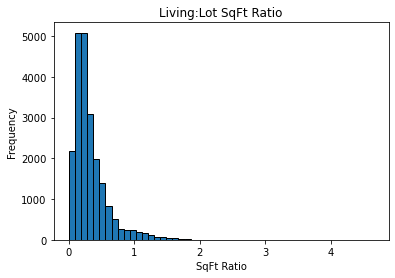

In [23]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Categorical Changes

### Basement Sqft to Categorical (Yes or No)

In [24]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [25]:
mod_df['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

### Basement Sqft to Categorical (Yes or No)

### Renovation Year to Categorical (Recent Reno or None)

In [26]:
# Using 27 years as a cutoff between recent renovations
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [27]:
mod_df['rec_reno'].value_counts()

0    21055
1      542
Name: rec_reno, dtype: int64

# Modified Features Exploration

## Dropping Unused Columns

In [28]:
processed = mod_df

In [29]:
processed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'psf', 'livtolot', 'has_basement',
       'rec_reno'],
      dtype='object')

In [30]:
modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']

In [31]:
processed = processed.drop(modded_cols, axis =1)

In [32]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

## Linearity Checks

In [33]:
len(processed.columns)

11

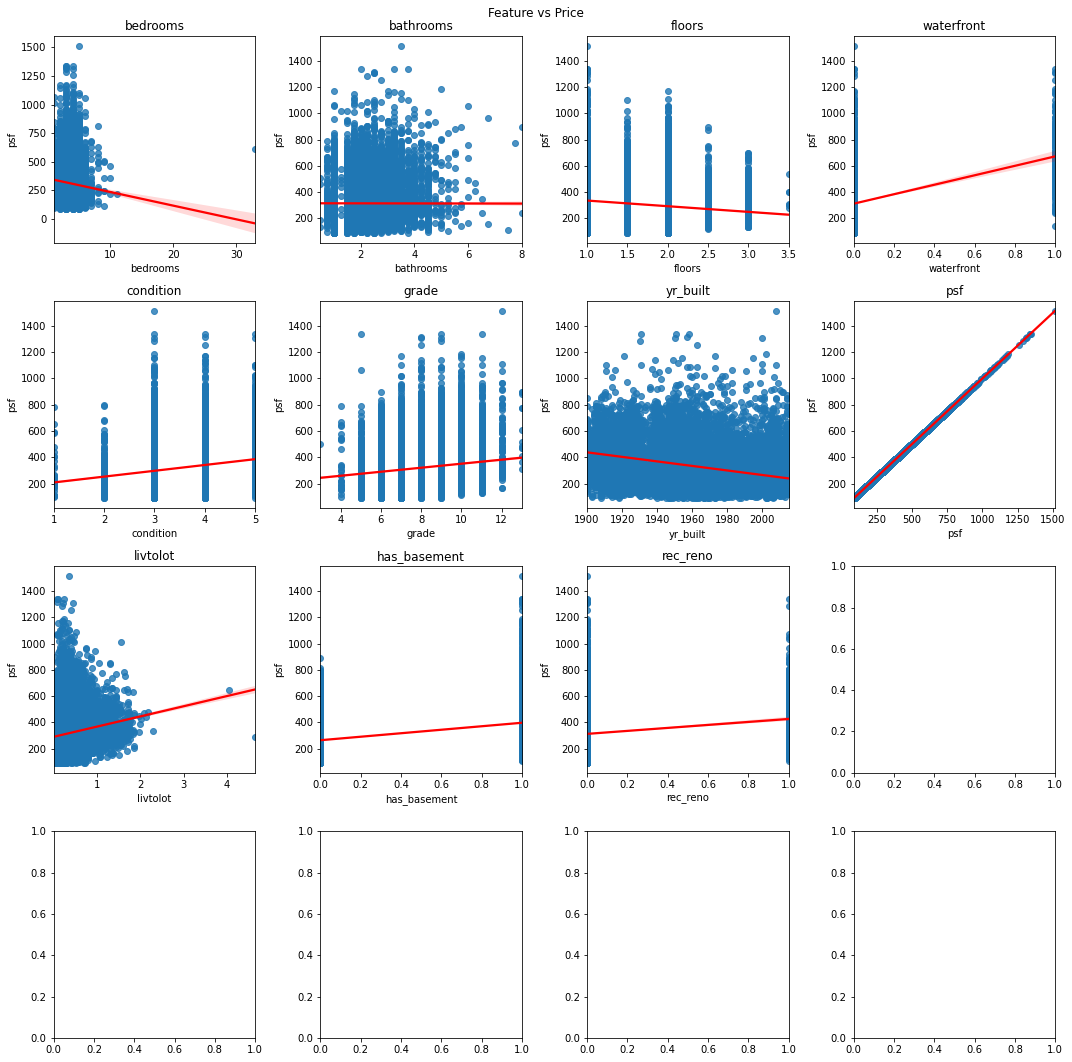

In [34]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

#### Removing Erroneous Looking Bedroom Value

In [35]:
processed = processed.drop(processed.loc[processed.bedrooms > 30].index)

#### Removing Large Liv to Lot Values

In [36]:
processed = processed.drop(processed.loc[processed.livtolot > 4].index)

## Second Linearity Checks

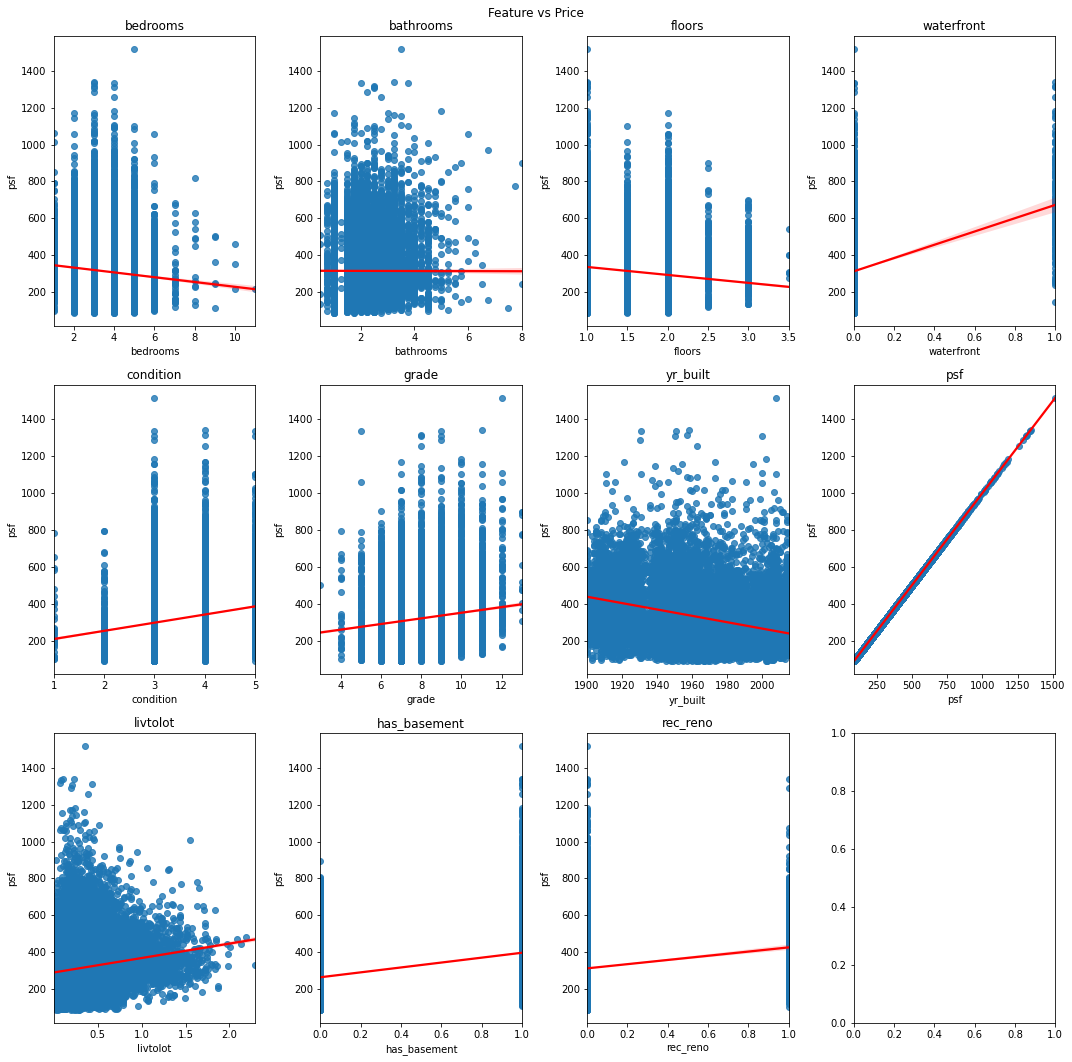

In [37]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

### Findings

* Many of the features do not appear strongly lineary related to PSF
* Considering transformations to improve R Squared after initial analysis

## MultiCollinearity

In [38]:
processed.corr()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
bedrooms,1.000000,0.527960,0.183948,-0.002058,0.023418,0.366487,0.160948,-0.079863,0.028521,0.160524,0.031583
bathrooms,0.527960,1.000000,0.502606,0.063629,-0.126446,0.665893,0.507177,-0.001636,0.290111,0.159860,0.068414
floors,0.183948,0.502606,1.000000,0.020808,-0.263984,0.458587,0.489176,-0.157900,0.560918,-0.252647,0.007530
waterfront,-0.002058,0.063629,0.020808,1.000000,0.016655,0.082842,-0.024499,0.200305,-0.030009,0.039230,0.048175
condition,0.023418,-0.126446,-0.263984,0.016655,1.000000,-0.146818,-0.361657,0.195487,-0.157287,0.130444,-0.072412
grade,0.366487,0.665893,0.458587,0.082842,-0.146818,1.000000,0.447779,0.121800,0.192043,0.050561,0.037720
yr_built,0.160948,0.507177,0.489176,-0.024499,-0.361657,0.447779,1.000000,-0.344073,0.283016,-0.164159,-0.155568
psf,-0.079863,-0.001636,-0.157900,0.200305,0.195487,0.121800,-0.344073,1.000000,0.141329,0.438232,0.120538
livtolot,0.028521,0.290111,0.560918,-0.030009,-0.157287,0.192043,0.283016,0.141329,1.000000,0.153518,0.013344
has_basement,0.160524,0.159860,-0.252647,0.039230,0.130444,0.050561,-0.164159,0.438232,0.153518,1.000000,0.049459


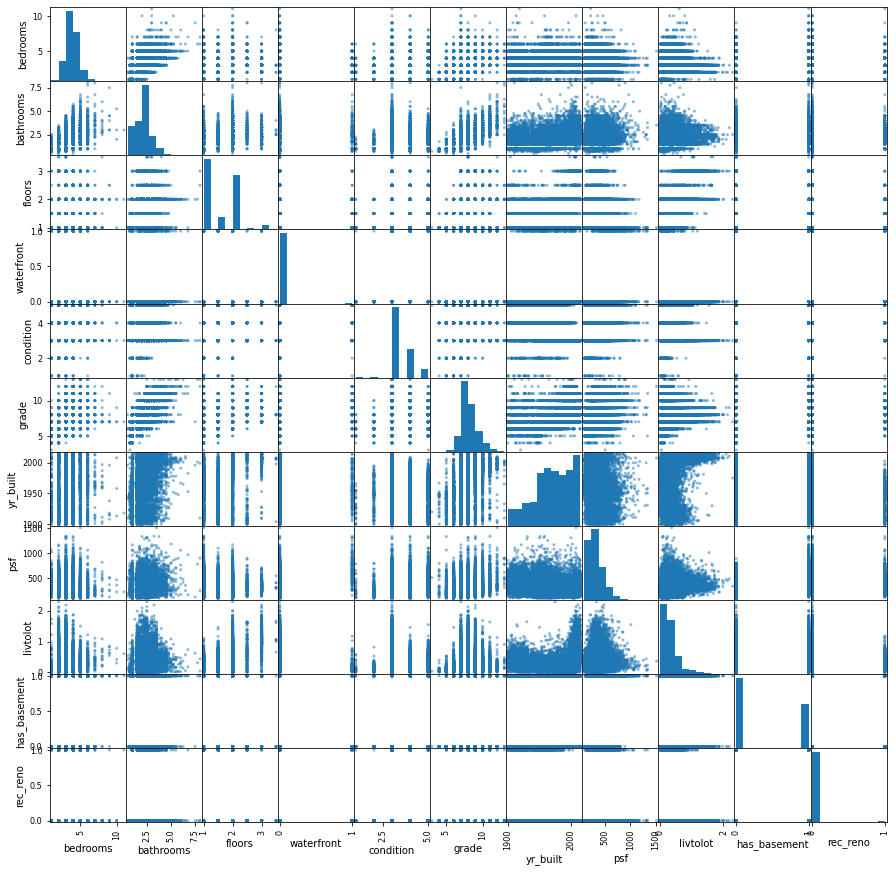

In [39]:
pd.plotting.scatter_matrix(processed, figsize = [15,15]);

### Findings

* There aren't any strong multicollinear features present
* Need to keep an eye on the relationship between bathrooms, floors, grade, and year built

# Initial Regression Modeling

In [40]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

In [41]:
x = processed[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Model Summary

In [42]:
initial_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.43203327916275913
Test R2:  0.4149661280612288
Train RMSE:  111.01299658909714
Test RMSE:  113.15007681991005


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     1313.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:25   Log-Likelihood:            -1.0587e+05
No. Observations:               17275   AIC:                         2.118e+05
Df Residuals:                   17264   BIC:                         2.118e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3895.2699     77.532     50.241      0.000    3743.300    4047.240
bedrooms       -29.3076      1.127    -26.001      0.000     -31.517     -27.098
bathrooms        0.5295      1.861      0.284      0.776      -3.119       4.178
floors         -40.4137      2.535    -15.941      0.000     -45.383     -35.445
waterfront     274.8145     10.281     26.730      0.000     254.662     294.967
condition       15.2513      1.427     10.684      0.000      12.453      18.049
grade           46.2921      1.002     46.218      0.000      44.329      48.255
yr_built        -1.9832      0.039    -50.242      0.000      -2.061      -1.906
livtolot       133.5890      4.252     31.419      0.000     125.255     141.923
has_basement    89.8770      2.135     42.092      0.000      85.692      94.062
rec_reno        27.4099      5.700      4.808      0.000      16.236      38.583
==============================================================================
Omnibus:                     3571.295   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11906.018
Skew:                           1.038   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dropping High P Values

In [43]:
x_bath = x.drop('bathrooms', axis = 1)

### Model Summary Update

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_bath,y,test_size=0.2)
initial_model2 = model(x_train,x_test,y_train,y_test);

Train R2:  0.4306263663720231
Test R2:  0.41993553300076025
Train RMSE:  111.51200991773553
Test RMSE:  111.17910298926566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:25   Log-Likelihood:            -1.0595e+05
No. Observations:               17275   AIC:                         2.119e+05
Df Residuals:                   17265   BIC:                         2.120e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3881.3107     72.516     53.523      0.000    3739.172    4023.450
bedrooms       -29.7590      1.049    -28.371      0.000     -31.815     -27.703
floors         -38.3962      2.478    -15.496      0.000     -43.253     -33.540
waterfront     283.2524     10.490     27.003      0.000     262.692     303.813
condition       16.6491      1.431     11.637      0.000      13.845      19.453
grade           46.6973      0.920     50.749      0.000      44.894      48.501
yr_built        -1.9797      0.037    -53.008      0.000      -2.053      -1.906
livtolot       129.5936      4.307     30.091      0.000     121.152     138.035
has_basement    89.8030      2.070     43.382      0.000      85.745      93.861
rec_reno        33.0423      5.552      5.952      0.000      22.161      43.924
==============================================================================
Omnibus:                     3668.465   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12532.814
Skew:                           1.058   Prob(JB):                         0.00
Kurtosis:                       6.596   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions Check

### Normalization

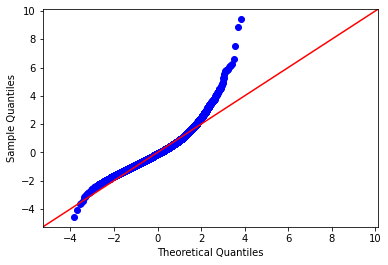

In [45]:
initial_residuals = initial_model2.resid
fig = sm.graphics.qqplot(initial_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

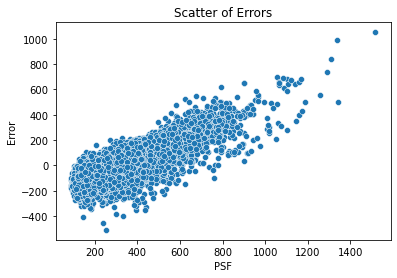

In [46]:
sns.scatterplot(y_train,initial_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

## Findings

* Benchmark R-Squared is .433
* RMSE difference between Train and Test is low at ~4 PSF 
* Distribution of Residuals are skewed to the right
* Fails homoscedasticity check, higher PSF are underpredicted

# Iteration 2: Log Transforms

## Log Transformation

In [47]:
log_df = processed.drop('bathrooms',axis=1)

In [48]:
log_cont = ['bedrooms','floors','condition','grade','yr_built','psf','livtolot']

In [49]:
for cat in log_cont:
    log_df[cat] = np.log(log_df[cat])

In [50]:
log_df.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
0,1.098612,0.000000,0.0,1.098612,1.945910,7.578145,5.236712,-1.566141,0,0
1,1.098612,0.693147,0.0,1.098612,1.945910,7.576097,5.513131,-1.035992,1,1
2,0.693147,0.000000,0.0,1.098612,1.791759,7.566828,5.454322,-2.563950,0,0
3,1.386294,0.000000,0.0,1.609438,1.945910,7.583248,6.354784,-0.936493,1,0
4,1.098612,0.000000,0.0,1.098612,2.079442,7.594381,5.715617,-1.570598,0,0


## Model Summary

In [51]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = log_df[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.41745103062739475
Test R2:  0.41144145167780477
Train RMSE:  0.3386991469366991
Test RMSE:  0.3366855441884503


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1375.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:26   Log-Likelihood:                -5809.5
No. Observations:               17275   AIC:                         1.164e+04
Df Residuals:                   17265   BIC:                         1.172e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       86.0566      1.669     51.555      0.000      82.785      89.328
bedrooms        -0.3878      0.010    -38.327      0.000      -0.408      -0.368
floors          -0.0896      0.010     -8.767      0.000      -0.110      -0.070
waterfront       0.5301      0.031     17.122      0.000       0.469       0.591
condition        0.1628      0.016     10.480      0.000       0.132       0.193
grade            1.0802      0.022     48.428      0.000       1.036       1.124
yr_built       -10.8528      0.221    -49.054      0.000     -11.286     -10.419
livtolot         0.0699      0.003     20.110      0.000       0.063       0.077
has_basement     0.3242      0.006     53.653      0.000       0.312       0.336
rec_reno         0.0535      0.017      3.126      0.002       0.020       0.087
==============================================================================
Omnibus:                       38.764   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.778
Skew:                          -0.051   Prob(JB):                     1.15e-10
Kurtosis:                       3.230   Cond. No.                     5.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform Features

In [52]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.4155780073429237
Test R2:  0.42792431505042405
Train RMSE:  112.15665913486319
Test RMSE:  113.657600638879


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1364.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:26   Log-Likelihood:            -1.0605e+05
No. Observations:               17275   AIC:                         2.121e+05
Df Residuals:                   17265   BIC:                         2.122e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.723e+04    550.432     49.475      0.000    2.62e+04    2.83e+04
bedrooms      -117.7905      3.370    -34.951      0.000    -124.396    -111.185
floors         -33.2627      3.401     -9.780      0.000     -39.929     -26.596
waterfront     271.0830     10.733     25.256      0.000     250.045     292.121
condition       56.3694      5.131     10.985      0.000      46.312      66.427
grade          350.7682      7.452     47.072      0.000     336.162     365.374
yr_built     -3631.4784     72.971    -49.766      0.000   -3774.508   -3488.449
livtolot        26.0643      1.155     22.576      0.000      23.801      28.327
has_basement    99.1365      2.004     49.475      0.000      95.209     103.064
rec_reno        31.5772      5.620      5.619      0.000      20.562      42.593
==============================================================================
Omnibus:                     3834.328   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13864.179
Skew:                           1.087   Prob(JB):                         0.00
Kurtosis:                       6.812   Cond. No.                     5.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform PSF

In [53]:
x_log = processed[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = log_df[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.4278046624115718
Test R2:  0.4341443057000062
Train RMSE:  0.33419698590261854
Test RMSE:  0.33597468365623967


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1434.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:26   Log-Likelihood:                -5578.3
No. Observations:               17275   AIC:                         1.118e+04
Df Residuals:                   17265   BIC:                         1.125e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.3539      0.217     75.305      0.000      15.928      16.780
bedrooms        -0.0994      0.003    -31.703      0.000      -0.106      -0.093
floors          -0.1138      0.007    -15.353      0.000      -0.128      -0.099
waterfront       0.5505      0.032     17.388      0.000       0.488       0.613
condition        0.0462      0.004     10.788      0.000       0.038       0.055
grade            0.1419      0.003     51.105      0.000       0.136       0.147
yr_built        -0.0059      0.000    -52.996      0.000      -0.006      -0.006
livtolot         0.3990      0.013     31.072      0.000       0.374       0.424
has_basement     0.2880      0.006     46.476      0.000       0.276       0.300
rec_reno         0.0537      0.017      3.220      0.001       0.021       0.086
==============================================================================
Omnibus:                       41.426   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.499
Skew:                          -0.041   Prob(JB):                     1.08e-11
Kurtosis:                       3.252   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Log transforming PSF yielded best results along with no high p values

## Assumptions Check

### Normalization

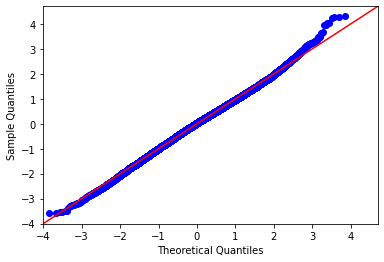

In [55]:
log_residuals = log_model.resid
fig = sm.graphics.qqplot(log_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

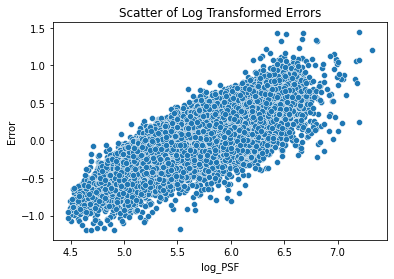

In [56]:
sns.scatterplot(y_train,log_residuals)
plt.title('Scatter of Log Transformed Errors')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared is worse at .426 after log transforming just PSF
* Difference in RMSE is low at .001 log(PSF), equates to ~ 1 PSF
* Distribution of residuals is close to normal
* Still fails homoscedasticity.  However, appears more randomly distributed

# Iteration 3: Adding Back ZipCodes

* Considered adding back some location features to see the effects on the model

## Re-updating DataFrame and Cleaning

In [57]:
dropped_columns2 = ['id','date','view','sqft_living15','sqft_lot15','bathrooms', 'lat','long']

In [58]:
df_zip = df.drop(dropped_columns2,axis=1)

In [59]:
df_zip.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [60]:
# Handling NA Values
df_zip = df_zip.fillna(0)
df_zip = df_zip.replace(to_replace='?',value=0)

# Feature Generation and Modifications
df_zip['sqft_basement'] = df_zip.sqft_basement.astype(float)
df_zip['psf'] = df_zip['price'] / df_zip['sqft_above']
df_zip['livtolot'] = df_zip['sqft_living']/df_zip['sqft_lot']
df_zip['has_basement'] = df_zip['sqft_basement'] > 0
df_zip['has_basement'] = df_zip['has_basement'].astype(int)
df_zip['rec_reno'] = (df_zip['yr_renovated'] > 1988).astype(int)

modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']
df_zip = df_zip.drop(modded_cols, axis =1)

# Removing Extreme Values
df_zip = df_zip.drop(df_zip.loc[df_zip.bedrooms > 30].index)
df_zip = df_zip.drop(df_zip.loc[df_zip.livtolot > 4].index)

In [61]:
df_zip.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,has_basement,rec_reno
0,3,1.0,0.0,3,7,1955,98178,188.050847,0.208850,0,0
1,3,2.0,0.0,3,7,1951,98125,247.926267,0.354874,1,1
2,2,1.0,0.0,3,6,1933,98028,233.766234,0.077000,0,0
3,4,1.0,0.0,5,7,1965,98136,575.238095,0.392000,1,0
4,3,1.0,0.0,3,8,1987,98074,303.571429,0.207921,0,0


## Creating Dummy Variables for Zipcodes

In [62]:
dummy_zips = pd.get_dummies(df_zip['zipcode'], prefix='zip', drop_first=True)
df_zip = pd.concat([df_zip, dummy_zips], axis=1)

In [63]:
df_zip = df_zip.drop('zipcode', axis=1)

## Model Summary

In [64]:
x_zip = df_zip.drop('psf',axis=1)
y_zip = df_zip[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_zip,y_zip,test_size=0.2)
zip_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.7202832942873475
Test R2:  0.7018238899297794
Train RMSE:  77.47449289901256
Test RMSE:  82.49078940185335


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     567.7
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:27   Log-Likelihood:                -99658.
No. Observations:               17275   AIC:                         1.995e+05
Df Residuals:                   17196   BIC:                         2.001e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      133.8225     67.837      1.973      0.049       0.856     266.789
bedrooms       -20.1465      0.745    -27.041      0.000     -21.607     -18.686
floors         -44.2587      1.760    -25.151      0.000     -47.708     -40.809
waterfront     332.7812      7.550     44.075      0.000     317.982     347.581
condition       19.0446      1.031     18.478      0.000      17.024      21.065
grade           14.2750      0.721     19.806      0.000      12.862      15.688
yr_built        -0.0053      0.035     -0.153      0.879      -0.073       0.063
livtolot       -34.2538      3.652     -9.380      0.000     -41.412     -27.096
has_basement    73.5994      1.477     49.821      0.000      70.704      76.495
rec_reno        34.9374      3.979      8.781      0.000      27.139      42.736
zip_98002       -3.4025      7.847     -0.434      0.665     -18.782      11.978
zip_98003       -4.6754      6.902     -0.677      0.498     -18.204       8.853
zip_98004      378.1218      6.755     55.978      0.000     364.882     391.362
zip_98005      181.5449      8.115     22.370      0.000     165.638     197.452
zip_98006      174.6295      6.058     28.827      0.000     162.756     186.503
zip_98007      158.8714      8.586     18.503      0.000     142.042     175.701
zip_98008      167.2195      6.899     24.239      0.000     153.697     180.742
zip_98010       51.3837     10.018      5.129      0.000      31.748      71.020
zip_98011       88.2347      7.698     11.461      0.000      73.145     103.324
zip_98014       66.0317      8.744      7.552      0.000      48.892      83.171
zip_98019       67.1462      7.736      8.680      0.000      51.984      82.309
zip_98022       15.6812      7.247      2.164      0.030       1.476      29.886
zip_98023      -15.2552      5.990     -2.547      0.011     -26.996      -3.515
zip_98024       99.9596     10.601      9.429      0.000      79.181     120.738
zip_98027      113.9923      6.311     18.063      0.000     101.622     126.362
zip_98028       89.3134      6.887     12.968      0.000      75.814     102.813
zip_98029      142.2928      6.769     21.023      0.000     129.026     155.560
zip_98030        7.5314      7.052      1.068      0.286      -6.291      21.353
zip_98031       12.3532      6.854      1.802      0.072      -1.081      25.788
zip_98032      -10.5038      8.917     -1.178      0.239     -27.982       6.975
zip_98033      218.7607      6.328     34.570      0.000     206.357     231.164
zip_98034      126.3929      5.907     21.399      0.000     114.816     137.970
zip_98038       39.2547      5.797      6.771      0.000      27.892      50.618
zip_98039      464.5893     12.917     35.966      0.000     439.270     489.908
zip_98040      269.6523      7.092     38.023      0.000     255.751     283.553
zip_9

### Dropping High P

In [65]:
(zip_model.pvalues > .05).sort_values()

Intercept    False
zip_98109    False
zip_98108    False
zip_98107    False
zip_98106    False
             ...  
zip_98042     True
zip_98198     True
zip_98188     True
zip_98031     True
zip_98032     True
Length: 79, dtype: bool

In [66]:
high_p = zip_model.pvalues.loc[zip_model.pvalues > .05].index
high_p

Index(['yr_built', 'zip_98002', 'zip_98003', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98042', 'zip_98092', 'zip_98188', 'zip_98198'],
      dtype='object')

In [67]:
#Intercept excluded for dropping columns
high_p_indexes = ['yr_built', 'zip_98002', 'zip_98003', 'zip_98022',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98042', 'zip_98092',
       'zip_98198']

In [68]:
zip_df_update = df_zip.drop(high_p_indexes,axis=1)

### Model Summary Update

In [69]:
x_zip2 = zip_df_update.drop('psf',axis=1)
y_zip2= zip_df_update[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_zip2,y_zip2,test_size=0.2)
zip_model2 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.7171857010877369
Test R2:  0.7121935885221415
Train RMSE:  78.5635908686231
Test RMSE:  78.43995679345532


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     641.7
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:27   Log-Likelihood:                -99899.
No. Observations:               17275   AIC:                         1.999e+05
Df Residuals:                   17206   BIC:                         2.005e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      128.2393      6.222     20.612      0.000     116.044     140.434
bedrooms       -20.5231      0.751    -27.326      0.000     -21.995     -19.051
floors         -42.4836      1.756    -24.190      0.000     -45.926     -39.041
waterfront     330.2640      7.537     43.822      0.000     315.492     345.036
condition       20.1646      0.998     20.199      0.000      18.208      22.121
grade           13.4938      0.688     19.612      0.000      12.145      14.842
livtolot       -33.4840      3.387     -9.885      0.000     -40.124     -26.844
has_basement    74.5842      1.490     50.045      0.000      71.663      77.505
rec_reno        38.7442      3.882      9.982      0.000      31.136      46.352
zip_98004      371.1297      5.228     70.991      0.000     360.883     381.377
zip_98005      182.0793      6.751     26.970      0.000     168.846     195.312
zip_98006      178.0783      4.345     40.983      0.000     169.561     186.595
zip_98007      153.8467      7.385     20.833      0.000     139.372     168.322
zip_98008      163.3816      5.598     29.184      0.000     152.408     174.355
zip_98010       51.9354      8.962      5.795      0.000      34.370      69.501
zip_98011       84.5233      6.461     13.081      0.000      71.858      97.188
zip_98014       57.5346      8.266      6.961      0.000      41.333      73.736
zip_98019       61.5657      6.492      9.483      0.000      48.840      74.291
zip_98023      -20.0217      4.349     -4.604      0.000     -28.546     -11.497
zip_98024       95.0866     10.664      8.917      0.000      74.184     115.989
zip_98027      110.2606      4.742     23.253      0.000     100.966     119.555
zip_98028       87.2613      5.558     15.701      0.000      76.368      98.155
zip_98029      139.1370      5.235     26.576      0.000     128.875     149.399
zip_98033      209.5444      4.573     45.819      0.000     200.580     218.509
zip_98034      121.8324      4.127     29.518      0.000     113.742     129.922
zip_98038       34.6787      4.019      8.629      0.000      26.802      42.556
zip_98039      461.5369     11.938     38.663      0.000     438.138     484.936
zip_98040      275.9922      5.655     48.802      0.000     264.907     287.077
zip_98045       58.4369      6.206      9.416      0.000      46.272      70.602
zip_98052      142.7457      4.063     35.134      0.000     134.782     150.709
zip_98053      112.8717      4.675     24.145      0.000     103.709     122.035
zip_98055       25.7680      5.753      4.479      0.000      14.492      37.044
zip_98056       58.5903      4.666     12.558      0.000      49.445      67.735
zip_98058       20.1981      4.417      4.573      0.000      11.540      28.856
zip_98059       61.6050      4.372     14.092      0.000      53.036      70.174
zip_9

## Assumptions Check

### Normalization

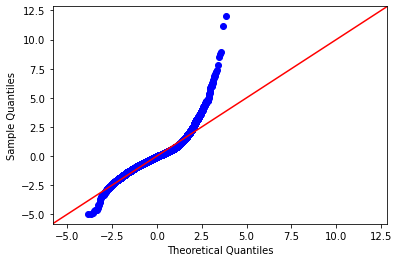

In [70]:
zip_residuals2 = zip_model2.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

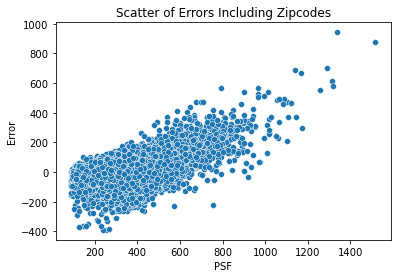

In [71]:
sns.scatterplot(y_train2,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('PSF')
plt.ylabel('Error');

## Log Transforming PSF for Zip Codes

In [72]:
zip_df_update2 = zip_df_update

In [73]:
zip_df_update2['psf'] = np.log(zip_df_update['psf'])

In [74]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2['psf']#.to_numpy().flatten()
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.7641781103104379
Test R2:  0.76211638358978
Train RMSE:  0.21570256740928898
Test RMSE:  0.21322700403887737


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     819.9
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:                 1985.2
No. Observations:               17275   AIC:                            -3832.
Df Residuals:                   17206   BIC:                            -3297.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0375      0.017    294.464      0.000       5.004       5.071
bedrooms        -0.0686      0.002    -33.042      0.000      -0.073      -0.065
floors          -0.1237      0.005    -25.582      0.000      -0.133      -0.114
waterfront       0.6687      0.021     32.283      0.000       0.628       0.709
condition        0.0581      0.003     21.184      0.000       0.053       0.063
grade            0.0390      0.002     20.522      0.000       0.035       0.043
livtolot        -0.1087      0.009    -11.774      0.000      -0.127      -0.091
has_basement     0.2369      0.004     57.684      0.000       0.229       0.245
rec_reno         0.1038      0.011      9.639      0.000       0.083       0.125
zip_98004        1.0892      0.014     75.771      0.000       1.061       1.117
zip_98005        0.6993      0.019     36.222      0.000       0.661       0.737
zip_98006        0.6551      0.012     54.342      0.000       0.632       0.679
zip_98007        0.6456      0.021     30.813      0.000       0.605       0.687
zip_98008        0.6343      0.016     40.824      0.000       0.604       0.665
zip_98010        0.1994      0.024      8.243      0.000       0.152       0.247
zip_98011        0.3924      0.018     22.171      0.000       0.358       0.427
zip_98014        0.2780      0.022     12.781      0.000       0.235       0.321
zip_98019        0.2698      0.018     14.989      0.000       0.235       0.305
zip_98023       -0.0701      0.012     -5.958      0.000      -0.093      -0.047
zip_98024        0.4102      0.027     15.279      0.000       0.358       0.463
zip_98027        0.4948      0.013     38.267      0.000       0.469       0.520
zip_98028        0.3962      0.015     26.626      0.000       0.367       0.425
zip_98029        0.5907      0.014     41.070      0.000       0.562       0.619
zip_98033        0.7496      0.012     60.444      0.000       0.725       0.774
zip_98034        0.5132      0.011     45.761      0.000       0.491       0.535
zip_98038        0.1230      0.011     11.294      0.000       0.102       0.144
zip_98039        1.2415      0.036     34.423      0.000       1.171       1.312
zip_98040        0.8902      0.015     58.301      0.000       0.860       0.920
zip_98045        0.2941      0.017     16.921      0.000       0.260       0.328
zip_98052        0.5983      0.011     53.135      0.000       0.576       0.620
zip_98053        0.4975      0.013     38.495      0.000       0.472       0.523
zip_98055        0.1096      0.015      7.087      0.000       0.079       0.140
zip_98056        0.2882      0.013     22.553      0.000       0.263       0.313
zip_98058        0.1242      0.012     10.049      0.000       0.100       0.148
zip_98059        0.2715      0.012     22.137      0.000       0.247       0.296
zip_9

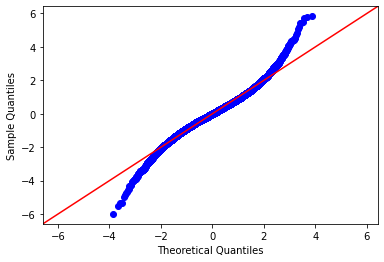

In [75]:
zip_residuals2 = zip_model3.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

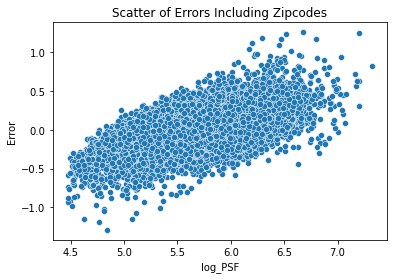

In [98]:
sns.scatterplot(y_train3,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared improved greatly to .76 after adding back zipcodes and log transforming PSF
* Difference in RMSE remains at ~ 1 PSF (.001 log of PSF)
* Residual normality distribution improved, but skewed at the tails
* Homoscedasticity improved as well, but still does not appear random

# Iteration 4: Dropping Outliers

* Continuing to improve on the log transformed model with zipcodes

## Modifying Modeling for Outliers

In [77]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [78]:
def model_outlier(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

## Model Summary

In [79]:
x_zip4 = zip_df_update2.drop('psf',axis=1)
y_zip4= zip_df_update2['psf']
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_zip4,y_zip4,test_size=0.2)

In [80]:
zip_model4 = model_outlier(x_train4,x_test4,y_train4,y_test4);

Train R2:  0.7622257767735733
Test R2:  0.7631545116699181
Train RMSE:  0.2136054875827981
Test RMSE:  0.21676251447783282


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     809.7
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:                 2150.2
No. Observations:               17245   AIC:                            -4162.
Df Residuals:                   17176   BIC:                            -3627.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0325      0.017    297.367      0.000       4.999       5.066
bedrooms        -0.0666      0.002    -32.518      0.000      -0.071      -0.063
floors          -0.1213      0.005    -25.352      0.000      -0.131      -0.112
waterfront       0.6346      0.022     29.406      0.000       0.592       0.677
condition        0.0564      0.003     20.797      0.000       0.051       0.062
grade            0.0394      0.002     20.997      0.000       0.036       0.043
livtolot        -0.1131      0.009    -12.235      0.000      -0.131      -0.095
has_basement     0.2368      0.004     58.304      0.000       0.229       0.245
rec_reno         0.1023      0.011      9.603      0.000       0.081       0.123
zip_98004        1.0688      0.014     74.289      0.000       1.041       1.097
zip_98005        0.6723      0.019     34.927      0.000       0.635       0.710
zip_98006        0.6564      0.012     55.583      0.000       0.633       0.680
zip_98007        0.6361      0.021     30.656      0.000       0.595       0.677
zip_98008        0.6468      0.015     42.143      0.000       0.617       0.677
zip_98010        0.1802      0.024      7.523      0.000       0.133       0.227
zip_98011        0.3839      0.017     22.034      0.000       0.350       0.418
zip_98014        0.2812      0.022     12.935      0.000       0.239       0.324
zip_98019        0.2721      0.018     15.357      0.000       0.237       0.307
zip_98023       -0.0547      0.012     -4.715      0.000      -0.077      -0.032
zip_98024        0.4201      0.027     15.344      0.000       0.366       0.474
zip_98027        0.4876      0.013     38.052      0.000       0.462       0.513
zip_98028        0.3978      0.015     26.676      0.000       0.369       0.427
zip_98029        0.5830      0.014     40.497      0.000       0.555       0.611
zip_98033        0.7649      0.013     60.999      0.000       0.740       0.789
zip_98034        0.5203      0.011     46.589      0.000       0.498       0.542
zip_98038        0.1236      0.011     11.359      0.000       0.102       0.145
zip_98039        1.2338      0.035     35.030      0.000       1.165       1.303
zip_98040        0.8696      0.015     57.781      0.000       0.840       0.899
zip_98045        0.2895      0.017     16.920      0.000       0.256       0.323
zip_98052        0.5938      0.011     54.557      0.000       0.572       0.615
zip_98053        0.4955      0.013     38.357      0.000       0.470       0.521
zip_98055        0.1259      0.015      8.311      0.000       0.096       0.156
zip_98056        0.2872      0.013     22.782      0.000       0.262       0.312
zip_98058        0.1152      0.012      9.649      0.000       0.092       0.139
zip_98059        0.2757      0.012     22.623      0.000       0.252       0.300
zip_9

## Assumptions Check

### Normalization

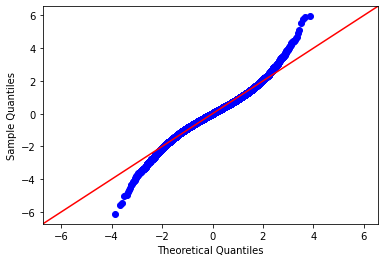

In [81]:
zip_residuals4 = zip_model4.resid
fig = sm.graphics.qqplot(zip_residuals4,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

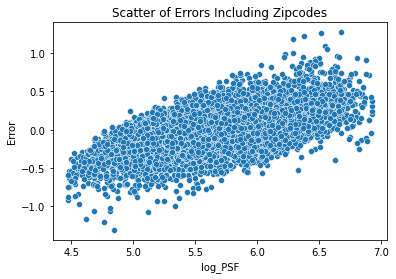

In [82]:
sns.scatterplot(y_train4,zip_residuals4)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* Model removing outliers after log transformation did not improve overall

# Iteration 5: Dropping Outliers before Log Transform

## Updating Model Function

In [87]:
def model_outlier_log(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # log transform PSF
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

In [90]:
zip_out_log = zip_df_update

## Model Summary

In [96]:
x_zol = zip_out_log.drop('psf',axis=1)
y_zol= zip_out_log['psf']
x_train_zol, x_test_zol, y_train_zol, y_test_zol = train_test_split(x_zol,y_zol,test_size=0.2)
zip_model_out_log = model_outlier_log(x_train_zol,x_test_zol,y_train_zol,y_test_zol);

Train R2:  0.7605206731007039
Test R2:  0.7604247422633614
Train RMSE:  0.038193315539704
Test RMSE:  0.03795630916753709


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     802.2
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:17:16   Log-Likelihood:                 31837.
No. Observations:               17245   AIC:                        -6.354e+04
Df Residuals:                   17176   BIC:                        -6.300e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6193      0.003    534.109      0.000       1.613       1.625
bedrooms        -0.0119      0.000    -32.424      0.000      -0.013      -0.011
floors          -0.0212      0.001    -24.725      0.000      -0.023      -0.020
waterfront       0.1072      0.004     29.003      0.000       0.100       0.114
condition        0.0099      0.000     20.540      0.000       0.009       0.011
grade            0.0067      0.000     19.712      0.000       0.006       0.007
livtolot        -0.0191      0.002    -11.485      0.000      -0.022      -0.016
has_basement     0.0427      0.001     58.657      0.000       0.041       0.044
rec_reno         0.0178      0.002      9.242      0.000       0.014       0.022
zip_98004        0.1872      0.003     71.855      0.000       0.182       0.192
zip_98005        0.1252      0.003     36.249      0.000       0.118       0.132
zip_98006        0.1200      0.002     56.013      0.000       0.116       0.124
zip_98007        0.1154      0.004     31.237      0.000       0.108       0.123
zip_98008        0.1164      0.003     43.661      0.000       0.111       0.122
zip_98010        0.0406      0.004      9.480      0.000       0.032       0.049
zip_98011        0.0732      0.003     23.499      0.000       0.067       0.079
zip_98014        0.0545      0.004     13.832      0.000       0.047       0.062
zip_98019        0.0493      0.003     15.051      0.000       0.043       0.056
zip_98023       -0.0123      0.002     -5.882      0.000      -0.016      -0.008
zip_98024        0.0776      0.005     16.101      0.000       0.068       0.087
zip_98027        0.0902      0.002     39.014      0.000       0.086       0.095
zip_98028        0.0734      0.003     27.754      0.000       0.068       0.079
zip_98029        0.1094      0.003     42.037      0.000       0.104       0.114
zip_98033        0.1353      0.002     61.208      0.000       0.131       0.140
zip_98034        0.0963      0.002     48.461      0.000       0.092       0.100
zip_98038        0.0231      0.002     11.965      0.000       0.019       0.027
zip_98039        0.2110      0.006     34.366      0.000       0.199       0.223
zip_98040        0.1573      0.003     57.064      0.000       0.152       0.163
zip_98045        0.0553      0.003     18.256      0.000       0.049       0.061
zip_98052        0.1104      0.002     56.613      0.000       0.107       0.114
zip_98053        0.0926      0.002     40.383      0.000       0.088       0.097
zip_98055        0.0230      0.003      8.449      0.000       0.018       0.028
zip_98056        0.0537      0.002     23.566      0.000       0.049       0.058
zip_98058        0.0239      0.002     11.068      0.000       0.020       0.028
zip_98059        0.0534      0.002     24.746      0.000       0.049       0.058
zip_9

## Assumptions Check

### Normality

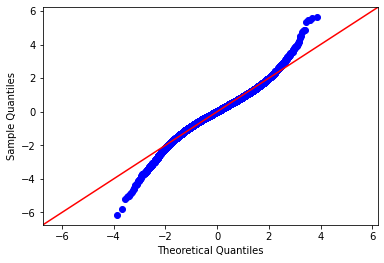

In [97]:
zip_residuals_out_log = zip_model_out_log.resid
fig = sm.graphics.qqplot(zip_residuals_out_log,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

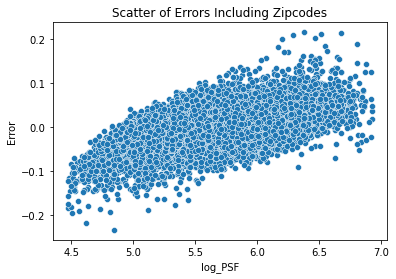

In [95]:
sns.scatterplot(y_train_zol,zip_residuals_out_log)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* No meaningful improvement over R Squared, RMSE, or Residuals Assumptions

# Iteration 6: Cubed Root Transformation of PSF

## Modifying Model Function

In [122]:
def model_recip(X_train, X_test, y_train, y_test):

    
    # Cubed Root Transform to PSF
    y_train = y_train ** (1/3)
    y_test = y_test ** (1/3)
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

In [123]:
zip_recip = zip_df_update

In [124]:
x_rec = zip_recip.drop('psf',axis=1)
y_rec= zip_recip['psf']
x_train_rec, x_test_rec, y_train_rec, y_test_rec = train_test_split(x_rec,y_rec,test_size=0.2)
zip_model_rec = model_recip(x_train_rec,x_test_rec,y_train_rec,y_test_rec);

Train R2:  0.7612836158848746
Test R2:  0.7696857968791502
Train RMSE:  0.022763265217858413
Test RMSE:  0.022159302832579983


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     806.9
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:39:32   Log-Likelihood:                 40832.
No. Observations:               17275   AIC:                        -8.153e+04
Df Residuals:                   17206   BIC:                        -8.099e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7149      0.002    956.686      0.000       1.711       1.718
bedrooms        -0.0074      0.000    -34.011      0.000      -0.008      -0.007
floors          -0.0132      0.001    -25.851      0.000      -0.014      -0.012
waterfront       0.0675      0.002     31.384      0.000       0.063       0.072
condition        0.0061      0.000     21.336      0.000       0.006       0.007
grade            0.0042      0.000     21.306      0.000       0.004       0.005
livtolot        -0.0115      0.001    -11.683      0.000      -0.013      -0.010
has_basement     0.0245      0.000     56.654      0.000       0.024       0.025
rec_reno         0.0108      0.001      9.652      0.000       0.009       0.013
zip_98004        0.1121      0.002     74.160      0.000       0.109       0.115
zip_98005        0.0731      0.002     35.891      0.000       0.069       0.077
zip_98006        0.0700      0.001     54.550      0.000       0.067       0.072
zip_98007        0.0683      0.002     30.335      0.000       0.064       0.073
zip_98008        0.0678      0.002     41.667      0.000       0.065       0.071
zip_98010        0.0197      0.003      7.550      0.000       0.015       0.025
zip_98011        0.0431      0.002     23.156      0.000       0.039       0.047
zip_98014        0.0308      0.002     13.405      0.000       0.026       0.035
zip_98019        0.0296      0.002     15.266      0.000       0.026       0.033
zip_98023       -0.0066      0.001     -5.297      0.000      -0.009      -0.004
zip_98024        0.0450      0.003     15.555      0.000       0.039       0.051
zip_98027        0.0526      0.001     39.469      0.000       0.050       0.055
zip_98028        0.0430      0.002     27.550      0.000       0.040       0.046
zip_98029        0.0633      0.002     41.646      0.000       0.060       0.066
zip_98033        0.0798      0.001     59.931      0.000       0.077       0.082
zip_98034        0.0562      0.001     47.306      0.000       0.054       0.059
zip_98038        0.0131      0.001     11.333      0.000       0.011       0.015
zip_98039        0.1302      0.004     35.993      0.000       0.123       0.137
zip_98040        0.0941      0.002     58.394      0.000       0.091       0.097
zip_98045        0.0309      0.002     16.925      0.000       0.027       0.034
zip_98052        0.0642      0.001     55.552      0.000       0.062       0.066
zip_98053        0.0541      0.001     38.966      0.000       0.051       0.057
zip_98055        0.0128      0.002      7.781      0.000       0.010       0.016
zip_98056        0.0316      0.001     22.967      0.000       0.029       0.034
zip_98058        0.0131      0.001     10.220      0.000       0.011       0.016
zip_98059        0.0307      0.001     23.974      0.000       0.028       0.033
zip_9

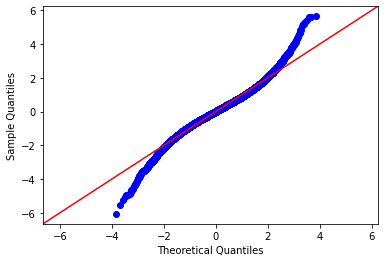

In [125]:
zip_residuals_rec = zip_model_rec.resid
fig = sm.graphics.qqplot(zip_residuals_rec,dist=stats.norm,line='45',fit=True)

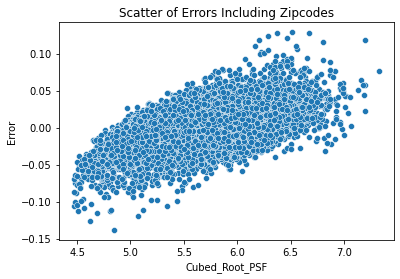

In [130]:
sns.scatterplot(y_train_rec,zip_residuals_rec)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('Cubed_Root_PSF')
plt.ylabel('Error');

In [132]:
zip_df_update.columns

Index(['bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'psf',
       'livtolot', 'has_basement', 'rec_reno', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_98199'],
      dtype='obj

In [134]:

def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [147]:
def model_all_out(X_train, X_test, y_train, y_test):
    cont_columns = ['bedrooms','condition','grade']#,'livtolot','floors']
    # remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    # remove outliers from other features
    for col in cont_columns:
        train_out = remove_outliers(X_train[col])
        X_train = X_train.drop(train_out)
        y_train = y_train.drop(train_out)
        
        test_out = remove_outliers(X_test[col])
        X_test = X_test.drop(test_out)
        y_test = y_test.drop(test_out)
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

In [148]:
x_rec = zip_recip.drop(['psf','livtolot','floors'],axis=1)
y_rec= zip_recip['psf']
x_train_rec, x_test_rec, y_train_rec, y_test_rec = train_test_split(x_rec,y_rec,test_size=0.2)
zip_model_rec = model_all_out(x_train_rec,x_test_rec,y_train_rec,y_test_rec);

Train R2:  0.7498447104547632
Test R2:  0.7548446681414924
Train RMSE:  0.21740070008799972
Test RMSE:  0.2160829507312268


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     695.5
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:59:26   Log-Likelihood:                 1646.8
No. Observations:               15380   AIC:                            -3160.
Df Residuals:                   15313   BIC:                            -2648.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.1226      0.022    236.840      0.000       5.080       5.165
bedrooms        -0.0747      0.002    -30.274      0.000      -0.080      -0.070
waterfront       0.6171      0.028     22.034      0.000       0.562       0.672
condition        0.0772      0.003     26.791      0.000       0.072       0.083
grade           -0.0075      0.002     -3.105      0.002      -0.012      -0.003
has_basement     0.2728      0.004     69.473      0.000       0.265       0.281
rec_reno         0.1137      0.012      9.627      0.000       0.091       0.137
zip_98004        1.1110      0.018     61.793      0.000       1.076       1.146
zip_98005        0.7346      0.022     33.264      0.000       0.691       0.778
zip_98006        0.6892      0.014     49.804      0.000       0.662       0.716
zip_98007        0.6476      0.024     27.156      0.000       0.601       0.694
zip_98008        0.6763      0.016     43.041      0.000       0.645       0.707
zip_98010        0.1941      0.027      7.282      0.000       0.142       0.246
zip_98011        0.4097      0.018     22.240      0.000       0.374       0.446
zip_98014        0.2838      0.024     11.901      0.000       0.237       0.331
zip_98019        0.2455      0.019     12.732      0.000       0.208       0.283
zip_98023       -0.0492      0.012     -4.062      0.000      -0.073      -0.025
zip_98024        0.4071      0.029     13.802      0.000       0.349       0.465
zip_98027        0.4487      0.014     31.066      0.000       0.420       0.477
zip_98028        0.4006      0.015     26.441      0.000       0.371       0.430
zip_98029        0.5491      0.015     36.685      0.000       0.520       0.578
zip_98033        0.7430      0.014     54.131      0.000       0.716       0.770
zip_98034        0.5258      0.012     44.428      0.000       0.503       0.549
zip_98038        0.0789      0.011      6.982      0.000       0.057       0.101
zip_98039        1.2866      0.049     26.228      0.000       1.190       1.383
zip_98040        0.9197      0.019     49.096      0.000       0.883       0.956
zip_98045        0.3077      0.017     17.658      0.000       0.274       0.342
zip_98052        0.6091      0.012     51.245      0.000       0.586       0.632
zip_98053        0.5188      0.014     36.289      0.000       0.491       0.547
zip_98055        0.1069      0.016      6.710      0.000       0.076       0.138
zip_98056        0.2870      0.014     20.795      0.000       0.260       0.314
zip_98058        0.1267      0.013      9.981      0.000       0.102       0.152
zip_98059        0.2479      0.013     19.062      0.000       0.222       0.273
zip_98065        0.2908      0.016     18.710      0.000       0.260       0.321
zip_98070        0.3131      0.024     13.052      0.000       0.266       0.360
zip_9

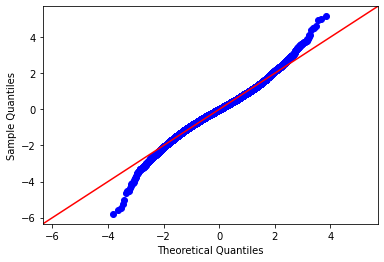

In [149]:
zip_residuals_rec = zip_model_rec.resid
fig = sm.graphics.qqplot(zip_residuals_rec,dist=stats.norm,line='45',fit=True)

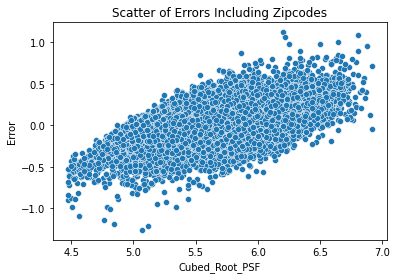

In [150]:
sns.scatterplot(y_train_rec,zip_residuals_rec)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('Cubed_Root_PSF')
plt.ylabel('Error');

In [143]:
zip_df_update

,bedrooms,floors,waterfront,condition,grade,psf,livtolot,has_basement,rec_reno,zip_98004,...,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98199
0,3,1.0,0.0,3,7,5.236712,0.208850,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.0,0.0,3,7,5.513131,0.354874,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,0.0,3,6,5.454322,0.077000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,0.0,5,7,6.354784,0.392000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1.0,0.0,3,8,5.715617,0.207921,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3.0,0.0,3,8,5.460836,1.352785,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,4,2.0,0.0,3,8,5.154217,0.397385,0,0,0,...,0,1,0,0,0,0,0,0,0,0
21594,2,2.0,0.0,3,7,5.976901,0.755556,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21595,3,2.0,0.0,3,8,5.521461,0.670017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


IndexError: index 6 is out of bounds for axis 0 with size 6

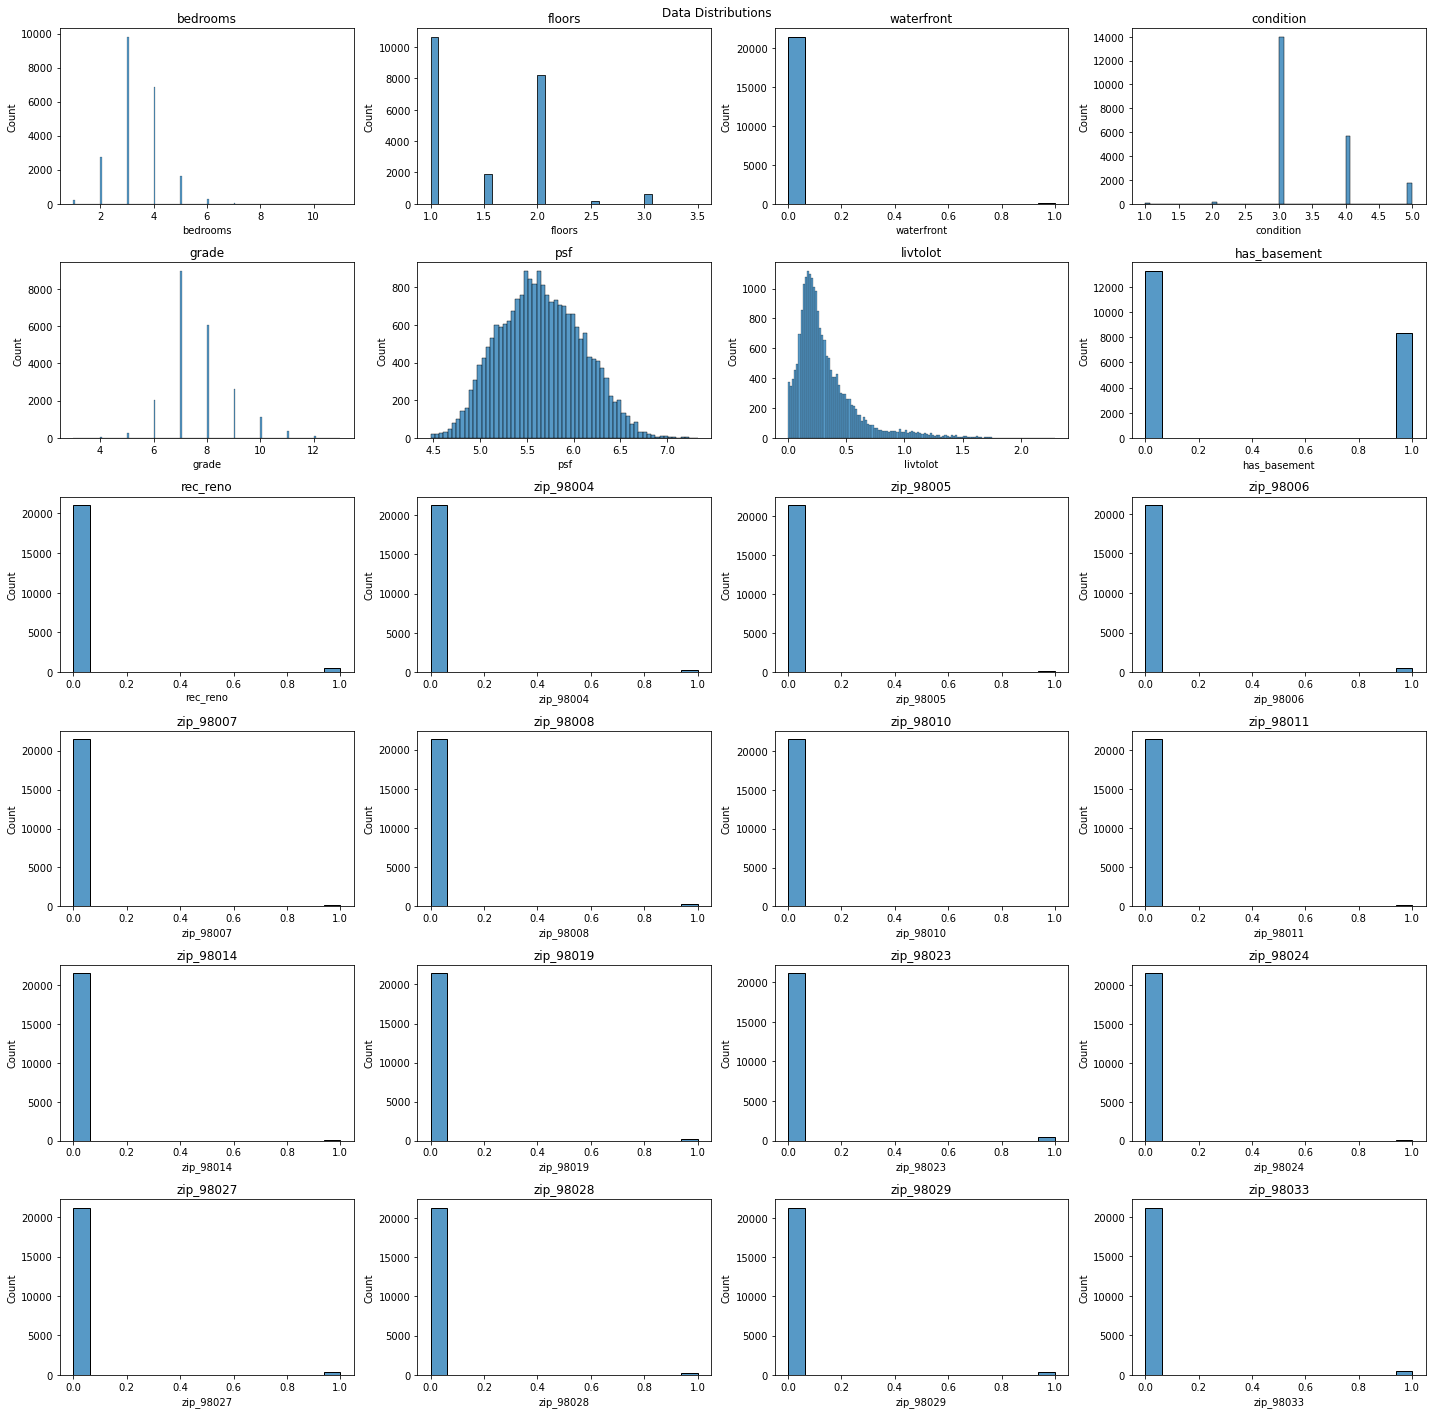

In [146]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=6)
for i in range(len(zip_df_update.columns)):
    col = zip_df_update.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(zip_df_update[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

<AxesSubplot:xlabel='psf', ylabel='Count'>

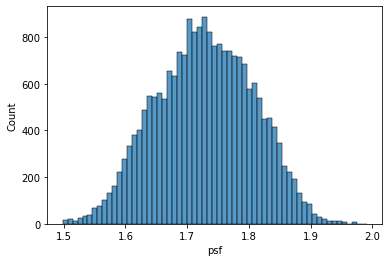

In [152]:
sns.histplot(np.log(zip_df_update['psf']), bins = 'auto')

# Conclusion

## Model Summary of Log Transformed PSF including Zipcodes

In [84]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.7663673803070441
Test R2:  0.7525219142484193
Train RMSE:  0.21480754049999196
Test RMSE:  0.21699946647446874


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     830.0
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:29   Log-Likelihood:                 2057.0
No. Observations:               17275   AIC:                            -3976.
Df Residuals:                   17206   BIC:                            -3441.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0458      0.017    297.060      0.000       5.013       5.079
bedrooms        -0.0680      0.002    -32.765      0.000      -0.072      -0.064
floors          -0.1294      0.005    -26.697      0.000      -0.139      -0.120
waterfront       0.6792      0.021     33.082      0.000       0.639       0.719
condition        0.0569      0.003     20.841      0.000       0.052       0.062
grade            0.0396      0.002     20.937      0.000       0.036       0.043
livtolot        -0.1027      0.009    -11.025      0.000      -0.121      -0.084
has_basement     0.2360      0.004     57.701      0.000       0.228       0.244
rec_reno         0.1016      0.011      9.567      0.000       0.081       0.122
zip_98004        1.1052      0.014     76.777      0.000       1.077       1.133
zip_98005        0.6929      0.019     35.713      0.000       0.655       0.731
zip_98006        0.6505      0.012     54.320      0.000       0.627       0.674
zip_98007        0.6405      0.021     30.424      0.000       0.599       0.682
zip_98008        0.6341      0.015     41.862      0.000       0.604       0.664
zip_98010        0.1934      0.025      7.650      0.000       0.144       0.243
zip_98011        0.4097      0.018     22.287      0.000       0.374       0.446
zip_98014        0.2822      0.023     12.419      0.000       0.238       0.327
zip_98019        0.2564      0.019     13.555      0.000       0.219       0.293
zip_98023       -0.0642      0.011     -5.610      0.000      -0.087      -0.042
zip_98024        0.4013      0.027     14.692      0.000       0.348       0.455
zip_98027        0.4916      0.013     38.122      0.000       0.466       0.517
zip_98028        0.3929      0.015     26.009      0.000       0.363       0.423
zip_98029        0.5948      0.014     41.168      0.000       0.566       0.623
zip_98033        0.7516      0.013     60.045      0.000       0.727       0.776
zip_98034        0.5152      0.011     46.537      0.000       0.494       0.537
zip_98038        0.1193      0.011     10.881      0.000       0.098       0.141
zip_98039        1.2459      0.035     35.183      0.000       1.176       1.315
zip_98040        0.8843      0.016     56.766      0.000       0.854       0.915
zip_98045        0.3028      0.017     17.604      0.000       0.269       0.337
zip_98052        0.5959      0.011     54.053      0.000       0.574       0.617
zip_98053        0.4862      0.013     37.554      0.000       0.461       0.512
zip_98055        0.1136      0.015      7.409      0.000       0.084       0.144
zip_98056        0.2838      0.013     21.951      0.000       0.258       0.309
zip_98058        0.1186      0.012      9.799      0.000       0.095       0.142
zip_98059        0.2716      0.012     22.379      0.000       0.248       0.295
zip_9

In [85]:
np.e**(zip_model3.params.sort_values(ascending=False))

Intercept    155.374673
zip_98039      3.475926
zip_98004      3.019746
zip_98109      2.948405
zip_98112      2.940441
                ...    
grade          1.040370
zip_98023      0.937805
bedrooms       0.934238
livtolot       0.902385
floors         0.878654
Length: 69, dtype: float64

# Appendix

## Other Explorations

### Regions using Latitude and Longitude

### Analysis via Regions using Zipcodes